<a href="https://colab.research.google.com/github/Maitry-P/Python-Coding-for-Public-Policy/blob/main/Final%20Project%3A%20Homeless%20Person%20Assistance_MP06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name:** Maitri Pujara





## **Problem Statement:**

Homelesses is a big concern in New York City. The Department of Homeless Services is tasked with providing services and housing for people who are homeless. They recently began publishing the count of homeless shelter buildings per community district on NYC Open Data to provide more transparency into where shelters are located. The dataset provides counts in multiple columns for different categories of buildings. It also includes counts from different reporting dates.

The 311 Service Requests dataset includes a complaint type called "Homeless Person Assistance". Let's find out if there's a relationship between the number of homeless assistance 311 requests and the concentration of homeless shelter buildings per community district.

### Step-1: Import packages

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

# To make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Step-2: Load Files

Step2a: 311 Complaint New York City Dataset

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Python | Fall 2020/HPA_311_NYC_MP.csv', encoding = "ISO-8859-1")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Created Date,Agency,Complaint Type,Community Board,Borough
0,09/24/2019 10:25:25 PM,DHS,Homeless Person Assistance,Unspecified BROOKLYN,BROOKLYN
1,09/27/2019 10:03:02 PM,DHS,Homeless Person Assistance,07 MANHATTAN,MANHATTAN
2,09/21/2019 08:03:01 PM,DHS,Homeless Person Assistance,02 MANHATTAN,MANHATTAN
3,09/20/2019 10:05:45 PM,DHS,Homeless Person Assistance,02 MANHATTAN,MANHATTAN
4,09/08/19 19:45,DHS,Homeless Person Assistance,Unspecified BROOKLYN,BROOKLYN


Step2b: Add a borocd column to all the community board

In [ ]:
df_step2 = df[df["Complaint Type"]=="Homeless Person Assistance"]
df_step2['Created Date'] = pd.to_datetime(df['Created Date']).dt.normalize()
df_step2

,Created Date,Agency,Complaint Type,Community Board,Borough
0,2019-09-24,DHS,Homeless Person Assistance,Unspecified BROOKLYN,BROOKLYN
1,2019-09-27,DHS,Homeless Person Assistance,07 MANHATTAN,MANHATTAN
2,2019-09-21,DHS,Homeless Person Assistance,02 MANHATTAN,MANHATTAN
3,2019-09-20,DHS,Homeless Person Assistance,02 MANHATTAN,MANHATTAN
4,2019-09-08,DHS,Homeless Person Assistance,Unspecified BROOKLYN,BROOKLYN
5,2019-09-01,DHS,Homeless Person Assistance,Unspecified MANHATTAN,MANHATTAN
6,2019-09-01,DHS,Homeless Person Assistance,Unspecified MANHATTAN,MANHATTAN
7,2019-09-01,DHS,Homeless Person Assistance,Unspecified MANHATTAN,MANHATTAN
8,2019-09-01,DHS,Homeless Person Assistance,Unspecified MANHATTAN,MANHATTAN
9,2019-09-01,DHS,Homeless Person Assistance,Unspecified MANHATTAN,MANHATTAN


In [ ]:
cb_counts = df.groupby('Community Board').size().reset_index(name='Count_of_HPA_Requests')
cb_counts = cb_counts.sort_values('Count_of_HPA_Requests', ascending=False)
cb_counts

,Community Board,Count_of_HPA_Requests
65,Unspecified MANHATTAN,384
22,05 MANHATTAN,262
30,07 MANHATTAN,184
18,04 MANHATTAN,144
8,02 MANHATTAN,143
26,06 MANHATTAN,105
64,Unspecified BROOKLYN,104
38,09 MANHATTAN,93
3,01 MANHATTAN,90
7,02 BROOKLYN,75


In [ ]:
def recode_borocd_counts(row):
    board = row["Community Board"]

    if board[0] != 'U':
        num = board[0:2]
        
        if 'MANHATTAN' in board:
            return '1' + num
        elif 'BRONX' in board:
            return '2' + num
        elif 'BROOKLYN' in board:
            return '3' + num
        elif 'QUEENS' in board:
            return '4' + num
        elif 'STATEN ISLAND' in board:
            return '5' + num

In [ ]:
# Main Dataframe-1
cb_counts['borocd'] = cb_counts.apply(recode_borocd_counts, axis=1)
cb_counts

,Community Board,Count_of_HPA_Requests,borocd
65,Unspecified MANHATTAN,384,None
22,05 MANHATTAN,262,105
30,07 MANHATTAN,184,107
18,04 MANHATTAN,144,104
8,02 MANHATTAN,143,102
26,06 MANHATTAN,105,106
64,Unspecified BROOKLYN,104,None
38,09 MANHATTAN,93,109
3,01 MANHATTAN,90,101
7,02 BROOKLYN,75,302


Final Dataframe-1 (I'll join this dataframe with another one later)

In [ ]:
final_cb_counts = cb_counts.dropna() 
final_cb_counts

,Community Board,Count_of_HPA_Requests,borocd
22,05 MANHATTAN,262,105
30,07 MANHATTAN,184,107
18,04 MANHATTAN,144,104
8,02 MANHATTAN,143,102
26,06 MANHATTAN,105,106
38,09 MANHATTAN,93,109
3,01 MANHATTAN,90,101
7,02 BROOKLYN,75,302
34,08 MANHATTAN,73,108
25,06 BROOKLYN,65,306


In [ ]:
final_cb_counts.dtypes

Community Board          object
Count_of_HPA_Requests     int64
borocd                   object
dtype: object

In [ ]:
final_cb_counts.shape

(62, 3)

### Step2: Load Another Dataset File

NYC Open dataset that provides the total count of different types of homeless shelter buildings per community district.
Data source page: https://data.cityofnewyork.us/Social-Services/Buildings-by-Borough-and-Community-District/3qem-6v3v/data
CSV data download link you can plug into the pd.read_csv() function: https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD

In [ ]:
drive.mount('/content/drive')
shelters_per_cd = pd.read_csv('/content/drive/MyDrive/Python | Fall 2020/NYC_BBL.csv', encoding = "ISO-8859-1")
shelters_per_cd.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Report Date,Borough,borocd,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


### Step-3: Filtering the dataframe

In [ ]:
# getting this unique list of Report Date values for 09/30/2019
shelters_per_cd = shelters_per_cd[shelters_per_cd['Report Date'] == '09/30/2019']
shelters_per_cd = shelters_per_cd.drop_duplicates()
shelters_per_cd

,Report Date,Borough,borocd,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


#### Step-4: Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

In [ ]:
# getting list of column names so they're easy to copy/paste
shelters_per_cd.columns

Index(['Report Date', 'Borough', 'borocd', 'Adult Family Comm Hotel',
       'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel',
       'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'],
      dtype='object')

In [ ]:
# fill in zeros where there are NaNs. this will allow us to add them.
shelters_per_cd = shelters_per_cd.fillna(0)
shelters_per_cd

,Report Date,Borough,borocd,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
shelters_per_cd['total'] = shelters_per_cd['Adult Family Comm Hotel'] + shelters_per_cd['Adult Family Shelter'] + shelters_per_cd['Adult Shelter'] + shelters_per_cd['Adult Shelter Comm Hotel'] + shelters_per_cd['FWC Cluster'] + shelters_per_cd['FWC Comm Hotel'] + shelters_per_cd['FWC Shelter']
shelters_per_cd

,Report Date,Borough,borocd,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0,26.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0,13.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0,8.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0


### Step-5: calculate the sum of all the individual count columns

In [ ]:
# create a list that captures all the columns we want to add togethewr
columns_to_sum = ['Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter']

# .sum() uses the list of columns provided and takes the sum across them
shelters_per_cd['count_of_total_shelters'] = shelters_per_cd[columns_to_sum].sum(axis=1)
shelters_per_cd

,Report Date,Borough,borocd,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total,count_of_total_shelters
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0,21.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0,26.0,26.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0,13.0,13.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0,8.0,8.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0


In [ ]:
# Main Dataframe-2
shelters_per_cd1 = shelters_per_cd.drop(['Adult Family Shelter', 'Adult Family Comm Hotel', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'Borough', 'FWC Comm Hotel', 'FWC Shelter', 'Report Date', 'total'], axis = 1)  
shelters_per_cd1

,borocd,count_of_total_shelters
624,201,15.0
625,202,8.0
626,203,23.0
627,204,32.0
628,205,21.0
629,206,26.0
630,207,13.0
631,208,1.0
632,209,8.0
633,210,3.0


In [ ]:
shelters_per_cd1.borocd = shelters_per_cd1.borocd.astype(str)

In [ ]:
shelters_per_cd1.dtypes

borocd                      object
count_of_total_shelters    float64
dtype: object

### Step-6: Merge two dataframes

In [ ]:
merged_data = pd.merge(left=final_cb_counts, right=shelters_per_cd1, left_on='borocd', right_on='borocd')
merged_data


,Community Board,Count_of_HPA_Requests,borocd,count_of_total_shelters
0,05 MANHATTAN,262,105,10.0
1,07 MANHATTAN,184,107,7.0
2,04 MANHATTAN,144,104,8.0
3,06 MANHATTAN,105,106,3.0
4,09 MANHATTAN,93,109,6.0
5,01 MANHATTAN,90,101,1.0
6,02 BROOKLYN,75,302,5.0
7,08 MANHATTAN,73,108,1.0
8,06 BROOKLYN,65,306,4.0
9,01 BROOKLYN,52,301,7.0


### Step-7 | LineGraph

In [ ]:
import altair as alt
base = alt.Chart(merged_data.reset_index()).encode(x='borocd')

alt.layer(
    base.mark_line(color='blue').encode(y='count_of_total_shelters'),
    base.mark_line(color='red').encode(y='Count_of_HPA_Requests')
)

alt.LayerChart(...)

### Step-8 | Final BarChart

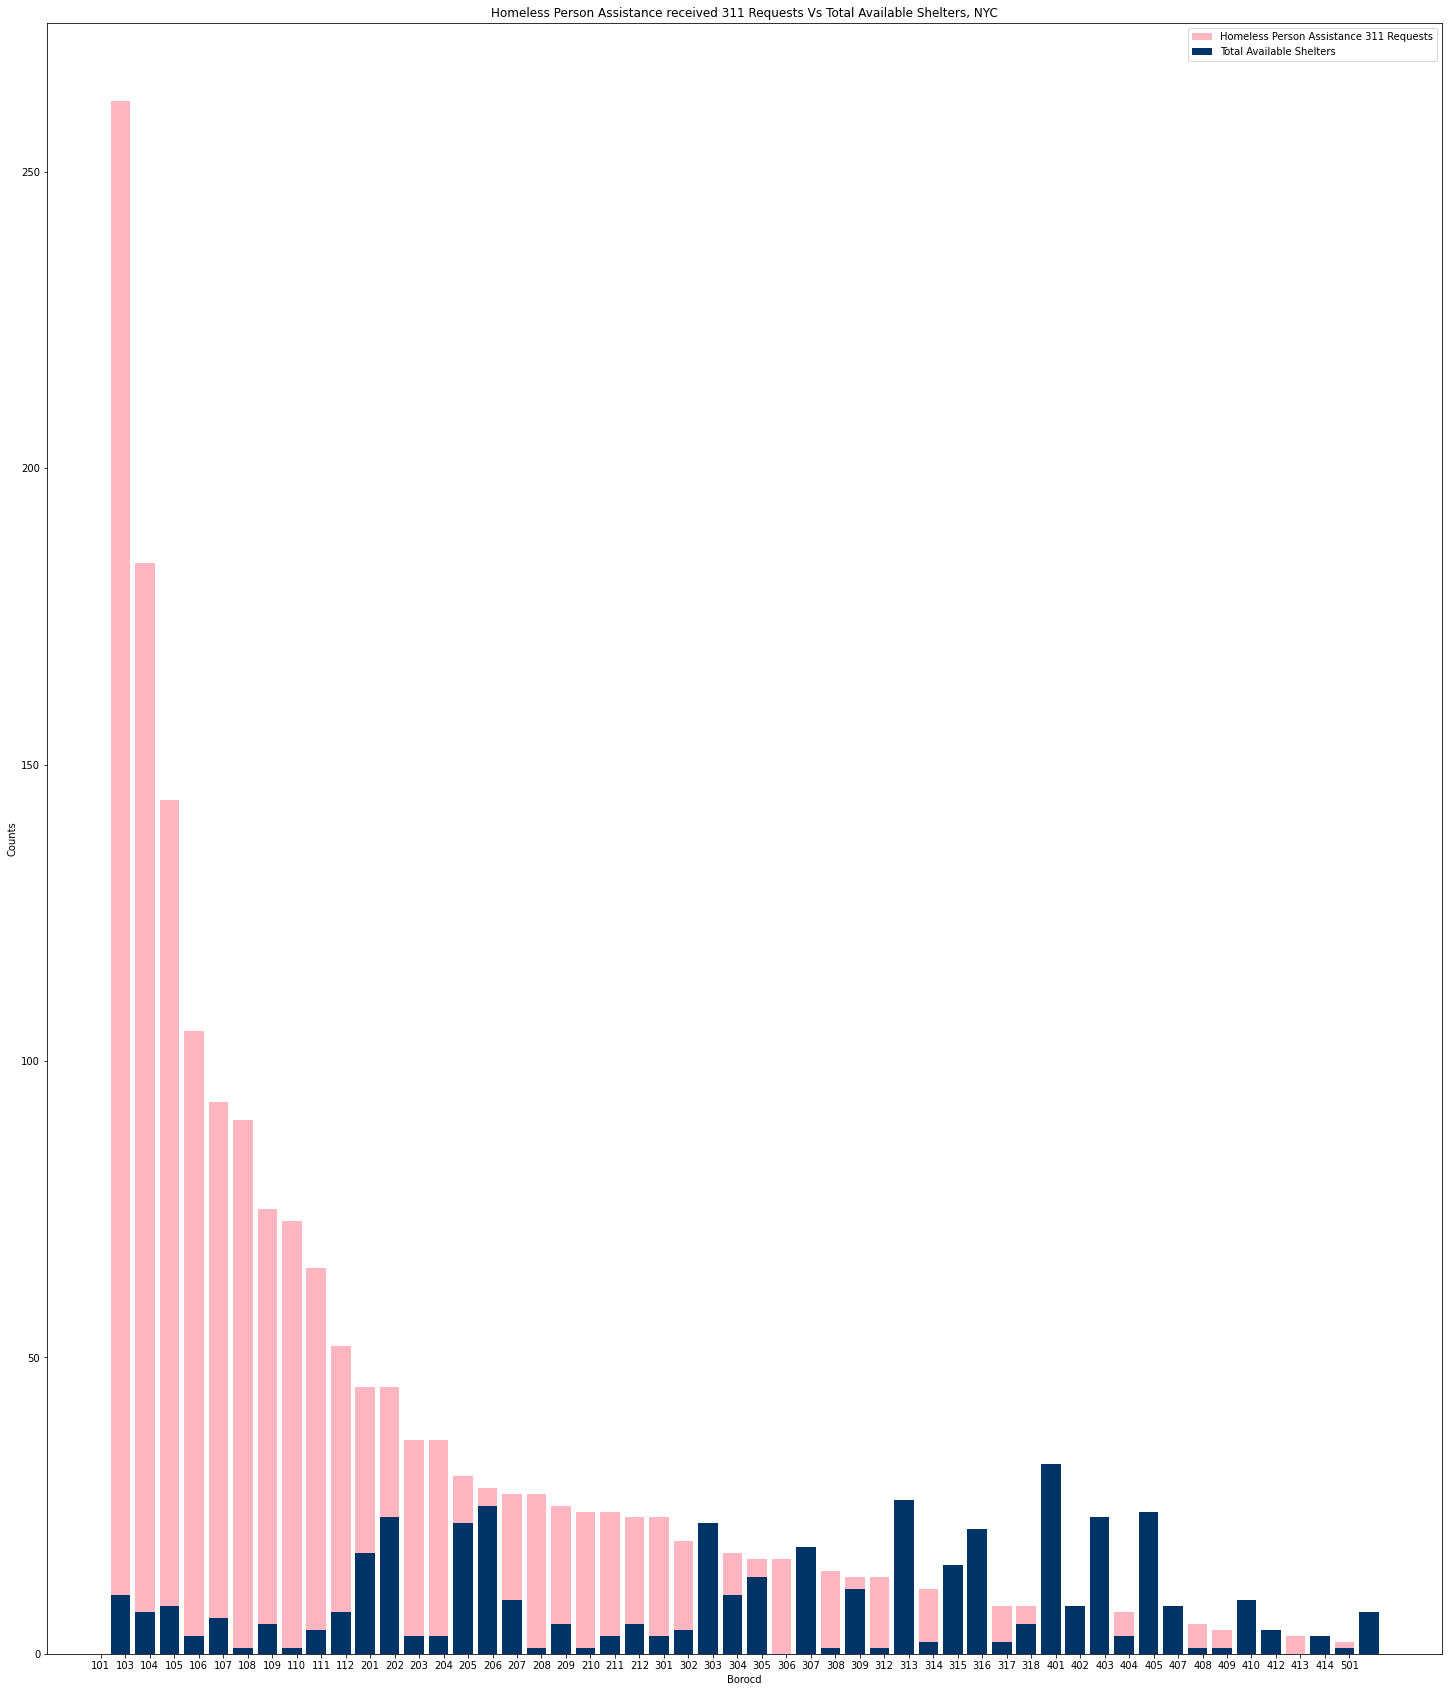

In [ ]:
y1 = merged_data['Count_of_HPA_Requests']
y2 = merged_data['count_of_total_shelters']
borocd = ['101', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '301', '302', '303', '304', '305', '306', '307', '308', '309', '312', '313', '314', '315', '316', '317', '318', '401', '402', '403', '404', '405', '407', '408', '409', '410', '412', '413', '414', '501']
X = np.arange(52)
plt.xticks(X,borocd) 
plt.rcParams['figure.figsize'] = (25,30)

plt.bar(X + 0.8, y1, label="Homeless Person Assistance 311 Requests", color = '#FFB6C1', width = 0.8)
plt.bar(X + 0.8, y2, label="Total Available Shelters", color = '#003366', width = 0.8)

plt.plot()

plt.xlabel("Borocd")
plt.ylabel("Counts")
plt.title("Homeless Person Assistance received 311 Requests Vs Total Available Shelters, NYC")
plt.legend()
plt.show()

### Step-9 | Regression model | Correlation between number of shelters and count of 311 homeless service requests

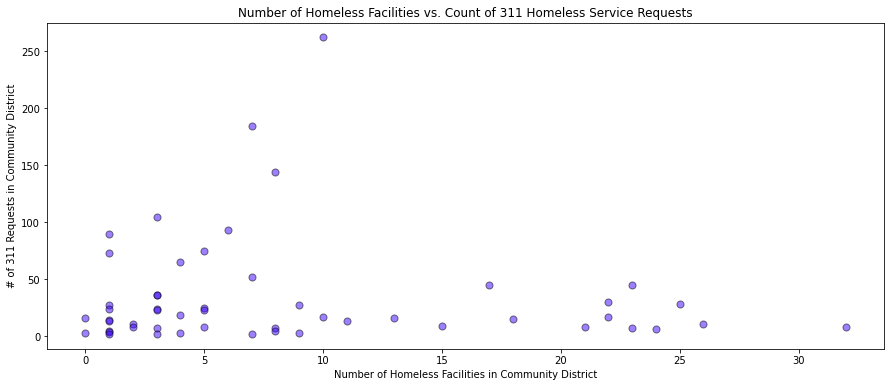

In [ ]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data.count_of_total_shelters), # x: array that fits within the range of the "total" column's values
    np.array(merged_data.Count_of_HPA_Requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('Number of Homeless Facilities vs. Count of 311 Homeless Service Requests')
plt.xlabel('Number of Homeless Facilities in Community District')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

### Step-10 | Correlation coefficient between count of total shelter buildings and count of homeless requests per community district

In [ ]:
np.corrcoef(merged_data.count_of_total_shelters, merged_data.Count_of_HPA_Requests)

array([[ 1.        , -0.07600794],
       [-0.07600794,  1.        ]])

### Step-11 | Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [ ]:
y = merged_data.Count_of_HPA_Requests

x = merged_data.count_of_total_shelters
# let's add a y intercept to our model
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
# Print out the statistics
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Count_of_HPA_Requests   R-squared:                       0.006
Model:                               OLS   Adj. R-squared:                 -0.014
Method:                    Least Squares   F-statistic:                    0.2905
Date:                   Mon, 14 Dec 2020   Prob (F-statistic):              0.592
Time:                           19:15:12   Log-Likelihood:                -275.54
No. Observations:                     52   AIC:                             555.1
Df Residuals:                         50   BIC:                             559.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Step-12 | Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package

In [ ]:
# see model parameters
model.params

# create label for line of best fit
label = 'y = ' + str(round(model.params[0],2)) + ' + ' + str(round(model.params[1],2)) + 'x'
print(label)

y = 38.32 + -0.44x


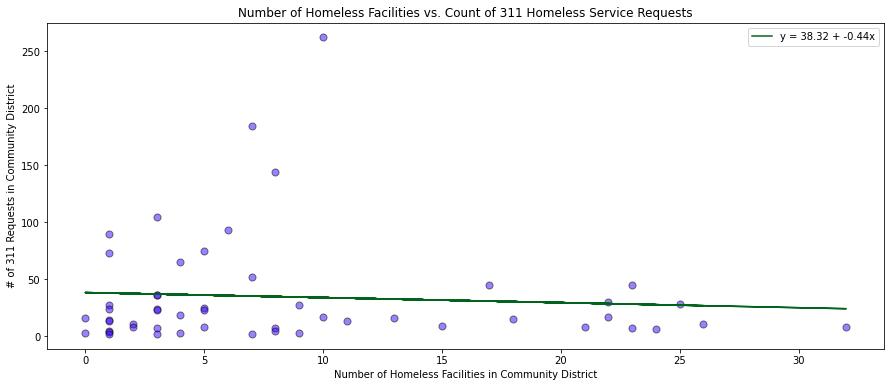

In [ ]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data.count_of_total_shelters), # x: array that fits within the range of the "total" column's values
    np.array(merged_data.Count_of_HPA_Requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

# line of best fit
plt.plot(
    np.array(merged_data.count_of_total_shelters), 
    model.params[0] +  model.params[1]*np.array(merged_data.count_of_total_shelters),
    c='#02631c', # darker green
    label=label)

plt.title('Number of Homeless Facilities vs. Count of 311 Homeless Service Requests')
plt.xlabel('Number of Homeless Facilities in Community District')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()

plt.show()

# **Conclusion:**

The results shows in a significant negative estimated slope for the relationship between Number of Homeless Facilities available vs Count of 311 Homeless Service Requests.

It seems like there is a missmatch between the demand of homeless shelter versus the available sheters in the New York City. It's clearly visible that in ceratin community districts, people have registered 311 homeless complaints. But, the amount of shelters available in all the community districts are not sufficient. They both are inversly correlated to each-other. 

## **Potential Explanation:**

After reading more about Dept. of Homeless Services' programs, it seems like the 'Homeless Person Assistance' 311 requests are targeted at helping people who live on the streets rather than in shelters. According to the most recent Homeless Outreach Population Estimate (HOPE), unsheltered homeless people live in the greatest numbers in Manhattan and on the subways. The counts of 311 requests reflect this trend. The community districts with the highest counts are all in Manhattan except for Brooklyn 2 (Downtown Brooklyn). It doesn't seem like the presence of homeless shelters in community districts is an attractive force that influences the number of 311 homeless service requests, and the sheltered populations in those areas are already receiving services.

### **Note:**
Special Thanks: Prof Aidan Feldman
